In [1]:
import sys
import os
import matplotlib.pyplot as plt 
from tensorflow import keras

# Add the parent directory of /notebooks to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
# Import the components from your new package
from src.agent import DQNAgent
from src.agent import DoubleDQNAgent
from src.env import CustomBlackjackEnv

c:\Users\rzvn1\scoop\persist\miniconda3\envs\neurojack\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import logging
# --- Configure logging at the very beginning of your main script ---
# This sets up a basic console handler for all loggers
# You can adjust the level here, e.g., logging.INFO or logging.DEBUG
logging.basicConfig(level=logging.INFO, format='%(message)s')

In [4]:
# Initialize the custom Blackjack environment
env = CustomBlackjackEnv(render_mode=None, num_decks=6, blackjack_payout=1.5,
                         allow_doubling=True, allow_splitting=True, count_cards=True)

# Observation and action space descriptions
print(f"Observation space: {env.observation_description}")
print(f"Action space: {env.action_description}")

# Dynamically derive state size and number of actions from env config
state_size = env.state_size
num_actions = env.num_actions
num_decks = env.num_decks
print(f"Derived state size: {state_size}, number of actions: {num_actions}")

# # Create models directory if it doesn't exist
# os.makedirs("models", exist_ok=True)

Observation space: (player_current_sum, dealer_card_showing, usable_ace, running_count, true_count)
Action space: 0: Stand, 1: Hit, 2: Double Down, 3: Split
Derived state size: 5, number of actions: 4


In [5]:
q_model = keras.Sequential([
            keras.layers.Input(shape=(state_size,)),
            keras.layers.Dense(32, activation='relu'),
            keras.layers.Dense(64, activation='relu'),
            keras.layers.Dense(128, activation='relu'),
            keras.layers.Dense(num_actions)
        ])

In [6]:
# Define parameters for the DQN Model
dqn_params = {
    "learning_rate": 1e-4,
    "gamma": 0.9,
    "epsilon_start": 1.0,
    "epsilon_end": 0.005,
    "epsilon_decay": 0.9985,
    "replay_buffer_capacity": 25000,
    "train_freq": 1,
    "target_update_freq": 1000,
    "verbose": 1, # or 0 for silent
    "q_net_model": q_model
}

# Define training parameters for the .fit method
training_params = {
    "num_episodes": 25000,
    "batch_size": 128,
    "log_interval": 2500
}

In [7]:
print("--- Training DQN Agent ---")

# Initialize with default parameters from settings.py
dqn_agent = DQNAgent(env, **dqn_params)# Pass params using **kwargs

# Start training
dqn_rewards_history = dqn_agent.fit(env, **training_params) # Pass params using **kwargs

# Save the trained model weights
dqn_agent.save_weights('models/dqn_blackjack.weights.h5')

Starting DQN training for 25000 episodes...


--- Training DQN Agent ---


Batch 1/10: 100%|██████████| 2500/2500 [00:16<00:00, 127.15 episode/s, AvgR=-0.20, Eps=0.023, Buf=3782, Steps/Int=3782]
Episode Batch 2500/25000, Avg Reward (last 2500): -0.2004
Batch 2/10:  16%|█▌        | 395/2500 [00:03<00:19, 108.90 episode/s, AvgR=-0.03, Eps=0.013, Buf=4455, Steps/Int=673]  


KeyboardInterrupt: 

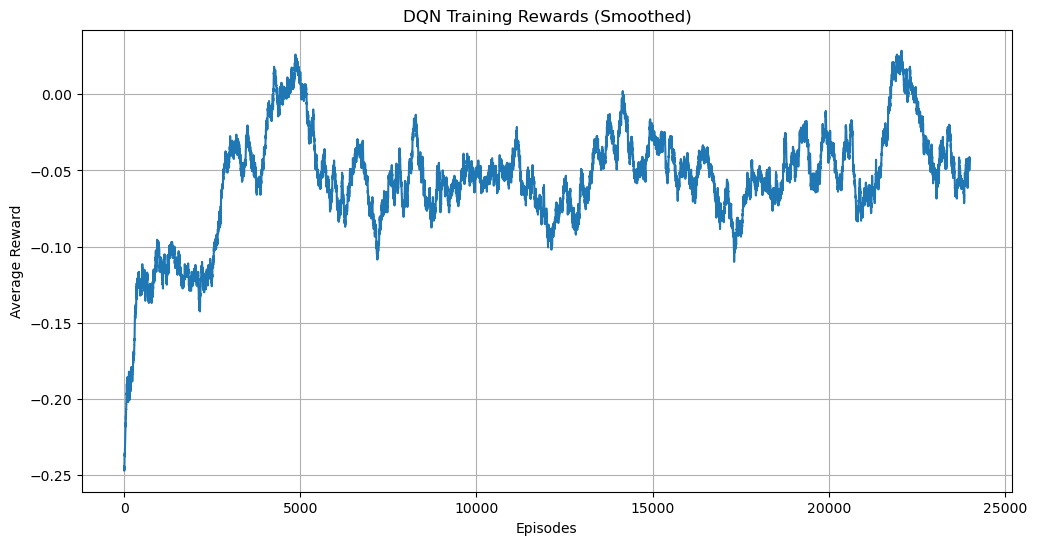

In [ ]:
dqn_agent.plot_history(dqn_rewards_history)

In [ ]:
print("\n--- Evaluating DQN Agent ---")
# eval_dqn_agent = DQNAgent(env, q_net_model=q_model)
# eval_dqn_agent.load_weights('models/dqn_blackjack.weights.h5')
dqn_eval = dqn_agent.evaluate(env, num_eval_episodes=10000)

Starting evaluation for 10000 episodes...



--- Evaluating DQN Agent ---


DQN Evaluation: 100%|██████████| 10000/10000 [01:06<00:00, 150.27episode/s, AvgR=-0.07]

--- Evaluation Results ---
Total Episodes: 10000
Average Reward: -0.0650
--------------------------


In [ ]:
print("\n--- Training Double DQN Agent ---")

double_dqn_agent = DoubleDQNAgent(env, **dqn_params)

# You can reuse training_params or define new ones
double_dqn_rewards_history = double_dqn_agent.fit(env, **training_params)

# Save the trained model weights
double_dqn_agent.save_weights('models/double_dqn_blackjack.weights.h5')

Double DQN initialized.
Starting Double DQN training for 25000 episodes...



--- Training Double DQN Agent ---


Batch 1/10: 100%|██████████| 2500/2500 [00:18<00:00, 114.78 episode/s, AvgR=-0.14, Eps=0.023, Buf=3938, Steps/Int=3938]
Episode Batch 2500/25000, Avg Reward (last 2500): -0.1376
Batch 2/10: 100%|██████████| 2500/2500 [00:23<00:00, 112.56 episode/s, AvgR=-0.04, Eps=0.005, Buf=8180, Steps/Int=4242]
Episode Batch 5000/25000, Avg Reward (last 2500): -0.0366
Batch 3/10: 100%|██████████| 2500/2500 [00:22<00:00, 118.86 episode/s, AvgR=-0.02, Eps=0.005, Buf=12447, Steps/Int=4267]
Episode Batch 7500/25000, Avg Reward (last 2500): -0.0234
Batch 4/10: 100%|██████████| 2500/2500 [00:23<00:00, 102.48 episode/s, AvgR=-0.00, Eps=0.005, Buf=16705, Steps/Int=4258]
Episode Batch 10000/25000, Avg Reward (last 2500): -0.0010
Batch 5/10: 100%|██████████| 2500/2500 [00:22<00:00, 114.49 episode/s, AvgR=-0.05, Eps=0.005, Buf=20877, Steps/Int=4172]
Episode Batch 12500/25000, Avg Reward (last 2500): -0.0526
Batch 6/10: 100%|██████████| 2500/2500 [00:22<00:00, 111.41 episode/s, AvgR=-0.01, Eps=0.005, Buf=25000, 

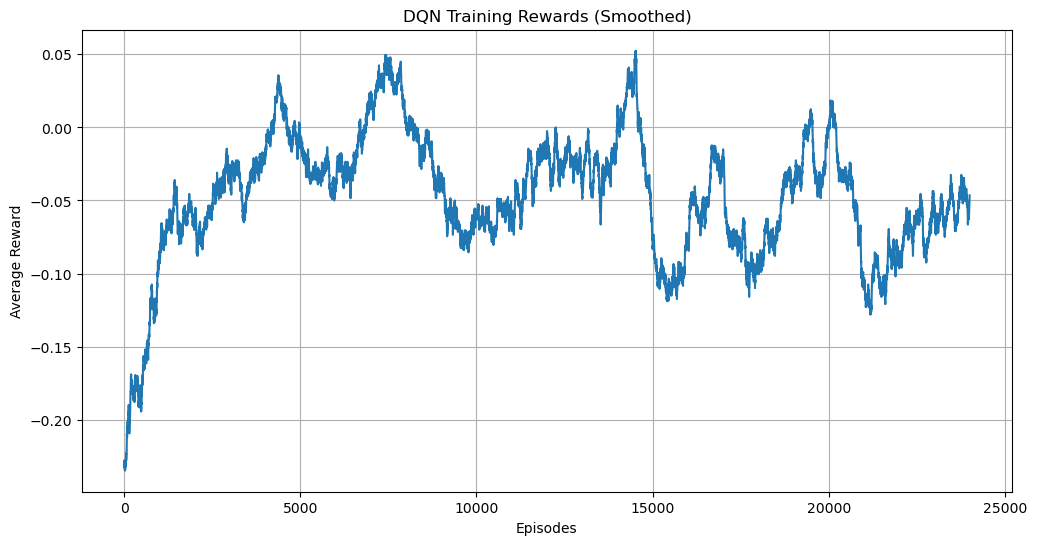

In [ ]:
double_dqn_agent.plot_history(double_dqn_rewards_history)

In [ ]:
print("\n--- Evaluating Double DQN Agent ---")
# eval_double_dqn_agent = DoubleDQNAgent(env, q_net_model=q_model)
# eval_double_dqn_agent.load_weights('models/double_dqn_blackjack.weights.h5')
ddqn_eval = double_dqn_agent.evaluate(env, num_eval_episodes=10000)

Starting evaluation for 10000 episodes...



--- Evaluating Double DQN Agent ---


Double DQN Evaluation: 100%|██████████| 10000/10000 [01:01<00:00, 163.76episode/s, AvgR=-0.04]

--- Evaluation Results ---
Total Episodes: 10000
Average Reward: -0.0374
--------------------------
